In [57]:
import numpy as np
import matplotlib.pyplot as plt

VERBOSE = True

## L1. Biased Coin Example

First "primitive" model: prob of heads is eaither 0.7 or 0.3 with a prob of 0.5

In [58]:
data = ['H', 'T', 'T', 'H', 'T', 'T', 'T']
data = np.array(data)



def primitive_model(N, r):
    # prob of observing a seq of r heads in N throws
    return 0.5 * 0.7**r * (1-0.7)**(N-r) + 0.5 * 0.3**r * (1-0.3)**(N-r)

print('Y_data:', data )
print('P(Y_data) = %.3f' %primitive_model(len(data), sum(data=='H')))

joint_data = np.append(data, 'H')
print()
print('Lets now make a prediction... Whats the prob that the next throw is H?')
print('Y_joint:', joint_data)
print('P(Y_pred = H | Y_data) = P(Y_data, Y_pred = H) / P(Y_data) = %.3f'%(  primitive_model(len(joint_data), sum(joint_data=='H'))/primitive_model(len(data), sum(data=='H')) ))




Y_data: ['H' 'T' 'T' 'H' 'T' 'T' 'T']
P(Y_data) = 0.008

Lets now make a prediction... Whats the prob that the next throw is H?
Y_joint: ['H' 'T' 'T' 'H' 'T' 'T' 'T' 'H']
P(Y_pred = H | Y_data) = P(Y_data, Y_pred = H) / P(Y_data) = 0.329


In [67]:
def predict_head(data, verbose=VERBOSE):
    joint_data = np.append(data, 'H')
    return primitive_model(len(joint_data), sum(joint_data=='H'))/primitive_model(len(data), sum(data=='H'))

print('test', predict_head(data))

test 0.32918918918918916


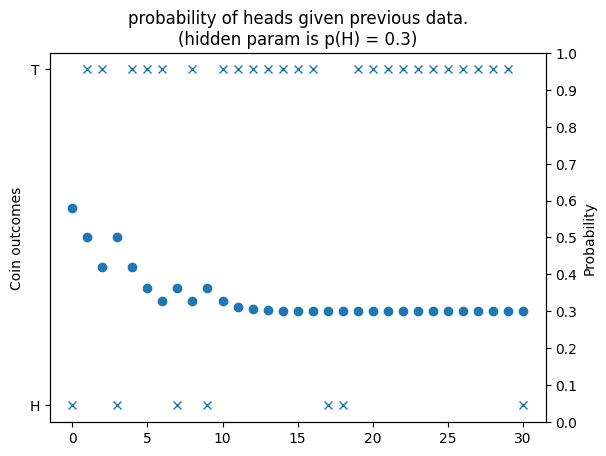

In [79]:
data_biased_coin = joint_data.copy()
for i in range(23):
    data_biased_coin = np.append(data_biased_coin, np.random.choice(['H', 'T'], p = [0.3, 0.7]))

probs = [predict_head(data_biased_coin[0:i]) for i in range(1, len(data_biased_coin)+1)]

x_ls =[i for i in range(len(data_biased_coin))]

fig, ax1 = plt.subplots()

ax1.plot(x_ls, data_biased_coin, 'x')
ax1.set_ylabel('Coin outcomes')
ax1.set_yticks([0, 1])
ax1.set_yticklabels(['H', 'T'])

ax2 = ax1.twinx()
ax2.plot(x_ls, probs, 'o')
ax2.set_ylabel('Probability')
ax2.set_yticks(np.linspace(0,1, 11))

ax1.set_title('probability of heads given previous data.\n(hidden param is p(H) = 0.3)')
print()


### In general: 
(integral is a sum)

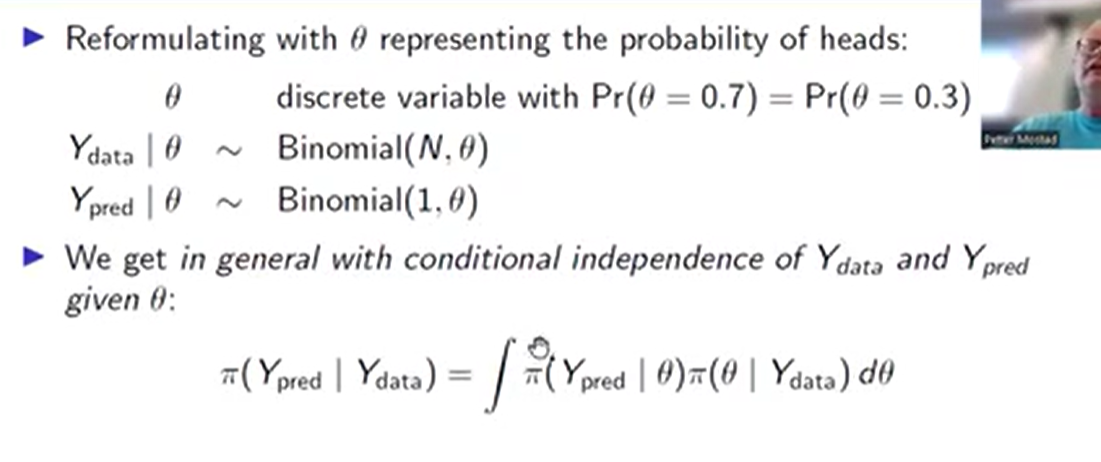

In [33]:
mprobs

[0.5,
 0.42000000000000004,
 0.4999999999999999,
 0.4200000000000001,
 0.5,
 0.58,
 0.6379310344827585,
 0.32918918918918916,
 0.36206896551724144,
 0.42000000000000004,
 0.5000000000000001,
 0.42,
 0.49999999999999983,
 0.5799999999999998,
 0.6379310344827586,
 0.6708108108108106,
 0.6869460112812248,
 0.30570087976539595,
 0.6869460112812247,
 0.6942991202346039,
 0.6975367044552198,
 0.6989405737953084,
 0.6995452719825925,
 0.6998049898831629,
 0.6999164009461252,
 0.6999641675546844,
 0.6999846424515809,
 0.699993418049131,
 0.6999971791373895,
 0.30000120894599064,
 0.3000028208626107]

In [52]:
data_biased_coin

array(['H', 'T', 'T', 'H', 'T', 'T', 'T', 'H', 'T', 'H', 'H', 'T', 'T',
       'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T',
       'T', 'T', 'T', 'T', 'T'], dtype='<U1')